<a href="https://www.kaggle.com/code/aibamayaalvarez/house-prices-eda-feature-selection-stacking?scriptVersionId=119582752" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# House Prices Explained| EDA | Feature Selection | Ensemble: Stacking

<img src="https://media.npr.org/assets/img/2022/09/21/gettyimages-1154599236_custom-bedac23b4b67530d8f7e0004bc5031bff8e55848-s800-c85.webp" alt="cover" width="400" align="center"/>

## Table of Contents

* [PREPROCESSING & EDA](#PREPROCESSING)
    * [Importing Libraries & Data](#Importing)
    * [Exploring Data](#Explorin)
        * [Data Types](#Types)
        * [Dealing with Duplicates](#Duplicates)
        * [Dealing with Missing Values](#Missing)
        * [Target Distribution](#Target)
    * [Looking at correlations with the target variable](#correlations) 
        * [Numerical Features](#Numerical)
        * [Categorical Features](#Categorical)
    * [Feature Selection & Encoding](#Selection)


* [MODELING](#MODELING)
    * [Baseline Models with 10-Folds CV](#Baseline)
    * [Hyperparameter Optimization](#Hyperparameter)
    * [Stacking](#Stacking)
    * [Prediction](#Prediction) 
    

* [CONCLUSION](#conclusion)
 

## Don't forget to upvote if you like my notebook   **:)**

## PREPROCESSING & EDA <a id="PREPROCESSING"></a>

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition is a challenge to predict the final price of each home.


### Importing Libraries & Data <a id="Importing"></a>

In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats # statistical tests

# visualization
import matplotlib.pyplot as plt 
import seaborn as sns
palettes=['BuPu', 'Purples_r','YlGnBu_r', 'cool','coolwarm_r', 'gist_rainbow', 'gnuplot2', 'hsv_r']
sns.set_palette(palettes[1])

# set pandas options to display all data
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('max_colwidth', None)

In [2]:
#### DATA DESCRIPTION ####

# with open('/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt') as description:
#     print(description.read())

In [3]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv', index_col=[0])
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv', index_col=[0])
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### Exploring Data <a id="Exploring"></a>
The first step in any analysis is getting to know the dataset. Before choosing a model, it's important to understand the problem and the output variable type (continuous, ordinal, categorical). It's also necessary to have a good understanding of the data, including the distribution, outliers, and patterns in the data.

We will explore the data types to classify the inputs and output features. Then clean the data from duplicates and handle missing values. Also, we will analyze the distribution target variable.

#### 1. Data Types <a id="Types"></a>

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
print('Train Data | Data Types')
print('Object: ', train.dtypes[train.dtypes==object].count())
print('Numeric: ',train.dtypes[train.dtypes!=object].count())
print('*'*20)
print('*'*20)
print('Test Data | Data Types:')
print('Object: ', test.dtypes[test.dtypes==object].count())
print('Numeric: ',test.dtypes[test.dtypes!=object].count())

Train Data | Data Types
Object:  43
Numeric:  37
********************
********************
Test Data | Data Types:
Object:  43
Numeric:  36


**Observation**
* There are a lot of missing values on some of the features.
* There are multiple types of features 
     * 43 - Categorical -Ordinal, Nominal, Binary-
     * 36 - Quantitative -Discrete, Continuous
* Most of the input features are Categorical.
* The output feature is Continuous.
* There are three categorical features classified as numerical they need to be changed to objects.
    * MSSubClass: Classify the building class
    * OverallQual and OverallCond: Rank the Quality and Condition of the house

In [7]:
# these three variables are categorical data encoded
train[['MSSubClass', 'OverallQual', 'OverallCond']] = train[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')
test[['MSSubClass', 'OverallQual', 'OverallCond']] = test[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')

#### 2. Dealing with Duplicates <a id="Duplicates"></a>

In [8]:
# Duplicated Data
train.duplicated().sum(), test.duplicated().sum()

(0, 0)

#### 3. Dealing with Missing Values <a id="Missing"></a>

In [9]:
# Missing Data
print('Train Features | % missing data')
print('*'*30)
print(round(train.isna().sum()[train.isna().sum()!=0] / train.shape[0] *100, 2).sort_values(ascending=False))
print('\n'*2)
print('Test Features | % missing data')
print('*'*30)
round(test.isna().sum()[test.isna().sum()!=0] / test.shape[0] *100, 2).sort_values(ascending=False)

Train Features | % missing data
******************************
PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64



Test Features | % missing data
******************************


PoolQC          99.79
MiscFeature     96.50
Alley           92.67
Fence           80.12
FireplaceQu     50.03
LotFrontage     15.56
GarageCond       5.35
GarageYrBlt      5.35
GarageQual       5.35
GarageFinish     5.35
GarageType       5.21
BsmtCond         3.08
BsmtExposure     3.02
BsmtQual         3.02
BsmtFinType1     2.88
BsmtFinType2     2.88
MasVnrType       1.10
MasVnrArea       1.03
MSZoning         0.27
BsmtFullBath     0.14
BsmtHalfBath     0.14
Functional       0.14
Utilities        0.14
GarageCars       0.07
GarageArea       0.07
TotalBsmtSF      0.07
KitchenQual      0.07
BsmtUnfSF        0.07
BsmtFinSF2       0.07
BsmtFinSF1       0.07
Exterior2nd      0.07
Exterior1st      0.07
SaleType         0.07
dtype: float64

**Observation**
* Most of the missing values are because the feature is not present in the house (according to the description).
* These missing values will be replaced by:
    * NA in categorical variables
    * 0 in numerical variables
* The features with a lower percentage of missing values will be replaced by the mean or mode.

In [10]:
# filling nan values of these columns with NA or 0 (Not Available) according to the data description

na_cat = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageCond','GarageQual','GarageFinish',
           'GarageType','BsmtCond','BsmtExposure','BsmtQual','BsmtFinType1','BsmtFinType2','MasVnrType'
         ]
train[na_cat] = train[na_cat].fillna('NA')
test[na_cat] = test[na_cat].fillna('NA')

na_num = ['GarageYrBlt','BsmtFullBath','BsmtHalfBath','GarageArea','GarageCars','MasVnrArea','TotalBsmtSF','BsmtUnfSF',
           'BsmtFinSF2','BsmtFinSF1'
         ]
train[na_num] = train[na_num].fillna(0)
test[na_num] = test[na_num].fillna(0)

In [11]:
# Categorical Features with a very low number of missing values will be replaced by the mode
train['Electrical'] = train['Electrical'].fillna("SBrkr") 
test['Functional'] = test['Functional'].fillna('Typ') 
test['Utilities'] = test['Utilities'].fillna('AllPub')
test['KitchenQual'] = test['KitchenQual'].fillna("TA") 
test['SaleType'] = test['SaleType'].fillna('WD')
test['Exterior1st'] = test['Exterior1st'].fillna('VinylSd') 
test['Exterior2nd'] = test['Exterior2nd'].fillna('VinylSd')

In [12]:
# Replaced all missing values in LotFrontage by imputing the median value of each neighborhood. 
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform( lambda x: x.fillna(x.mean()))
test['LotFrontage'] = test.groupby('Neighborhood')['LotFrontage'].transform( lambda x: x.fillna(x.mean()))

# Replaced all missing values in MSZoning by the mode value of each neighborhood. 
test['MSZoning'] = test.groupby(['Neighborhood'])['MSZoning'].transform(lambda x: x.fillna(x.mode().iloc[0]))

In [13]:
# Missing Data
print('Train Features | % missing data')
print('*'*30)
print(round(train.isna().sum()[train.isna().sum()!=0] / train.shape[0] *100, 2).sort_values(ascending=False))
print('\n'*2)
print('Test Features | % missing data')
print('*'*30)
round(test.isna().sum()[test.isna().sum()!=0] / test.shape[0] *100, 2).sort_values(ascending=False)

Train Features | % missing data
******************************
Series([], dtype: float64)



Test Features | % missing data
******************************


Series([], dtype: float64)

#### 4. Target Distribution <a id="Target"></a>

In [14]:
train.SalePrice.describe().to_frame()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


In [15]:
def targe_plot(target):
    fig, ax = plt.subplots(1, 3,figsize=(18,6), dpi=100)

    sns.histplot(x=target, data=train, kde=True, element="step", stat="density", ax=ax[0])

    ## Plotting the QQ_Plot. 
    stats.probplot(train.loc[:,target], plot = ax[1])

    sns.boxplot(x=target, data=train,  ax=ax[2])
    ax[0].set_title(f"Skewness: {train[target].skew()}  \n Kurtosis: {train[target].kurt()}", fontsize=14, )

    plt.suptitle(target, fontsize=18)
    fig.tight_layout()
    plt.show()

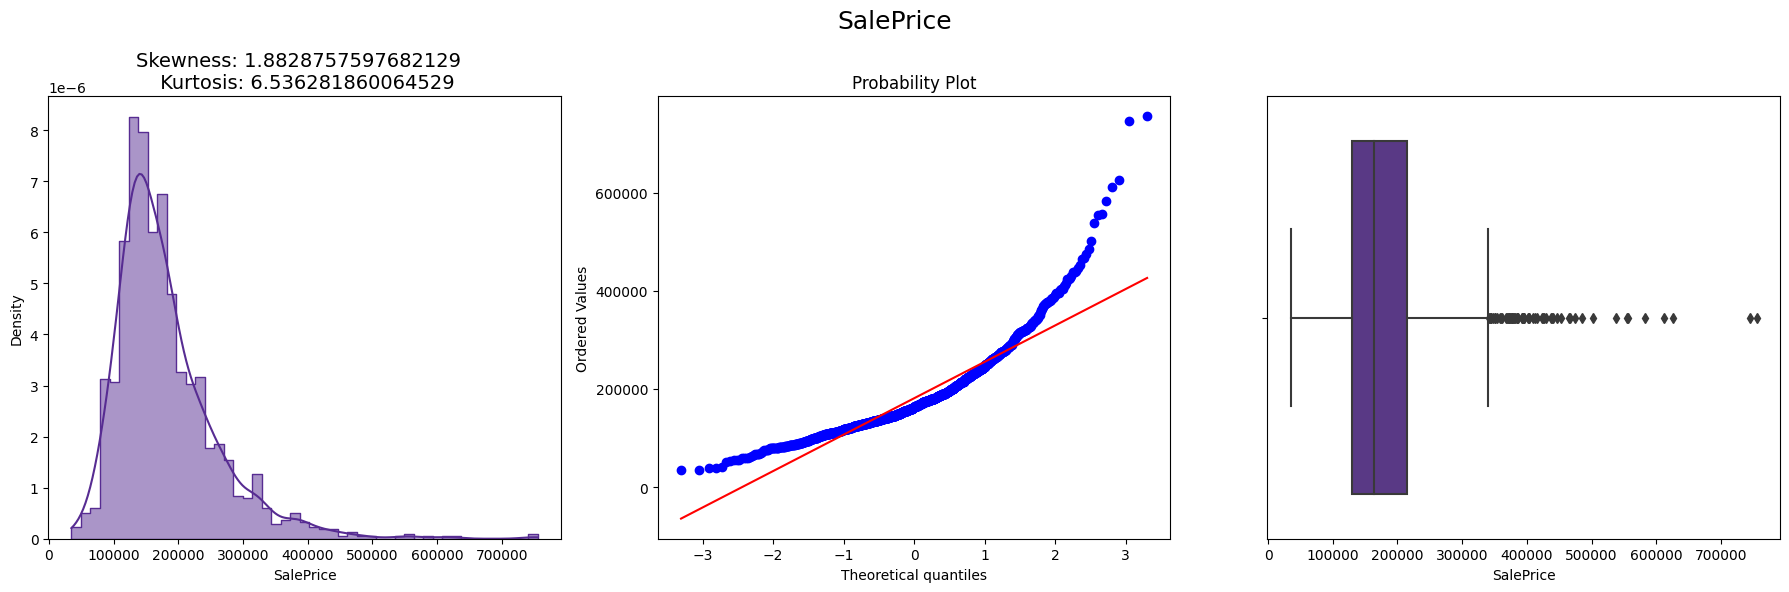

In [16]:
targe_plot('SalePrice')

**Skewness**: Skewness is a measure of the asymmetry of a distribution. A distribution is symmetric if the values on either side of the center are roughly the same. A distribution with a skewness value of 0 is perfectly symmetric. A distribution with a skewness value greater than 0 is positively skewed, which means that the tail on the right side of the distribution is longer or fatter than the tail on the left side. A distribution with a skewness value less than 0 is negatively skewed, which means that the tail on the left side of the distribution is longer or fatter than the tail on the right side.

**Kurtosis**: Kurtosis is a measure of the "peakedness" of a distribution. A distribution with a kurtosis value of 0 is mesokurtic, which means that it has a similar peakedness as a normal distribution. A distribution with a kurtosis value greater than 0 is leptokurtic, which means that it has a higher peakedness than a normal distribution. A distribution with a kurtosis value less than 0 is platykurtic, which means that it has a lower peakedness than a normal distribution.

It's important to note that while a normal distribution has a skewness of 0 and a kurtosis of 3, other distributions can have different values of skewness and kurtosis and still be considered normal.

**Observations**
* Our target variable, **SalePrice** is not normally distributed.
* Our target variable is right-skewed. 
* There are multiple outliers in the variable.
* We will create a new feature (Log_SalePrice)to hold the target variable normally distributed because many linear models and statistical tests assume this. 
* We will transform the target with the log function from numpy.

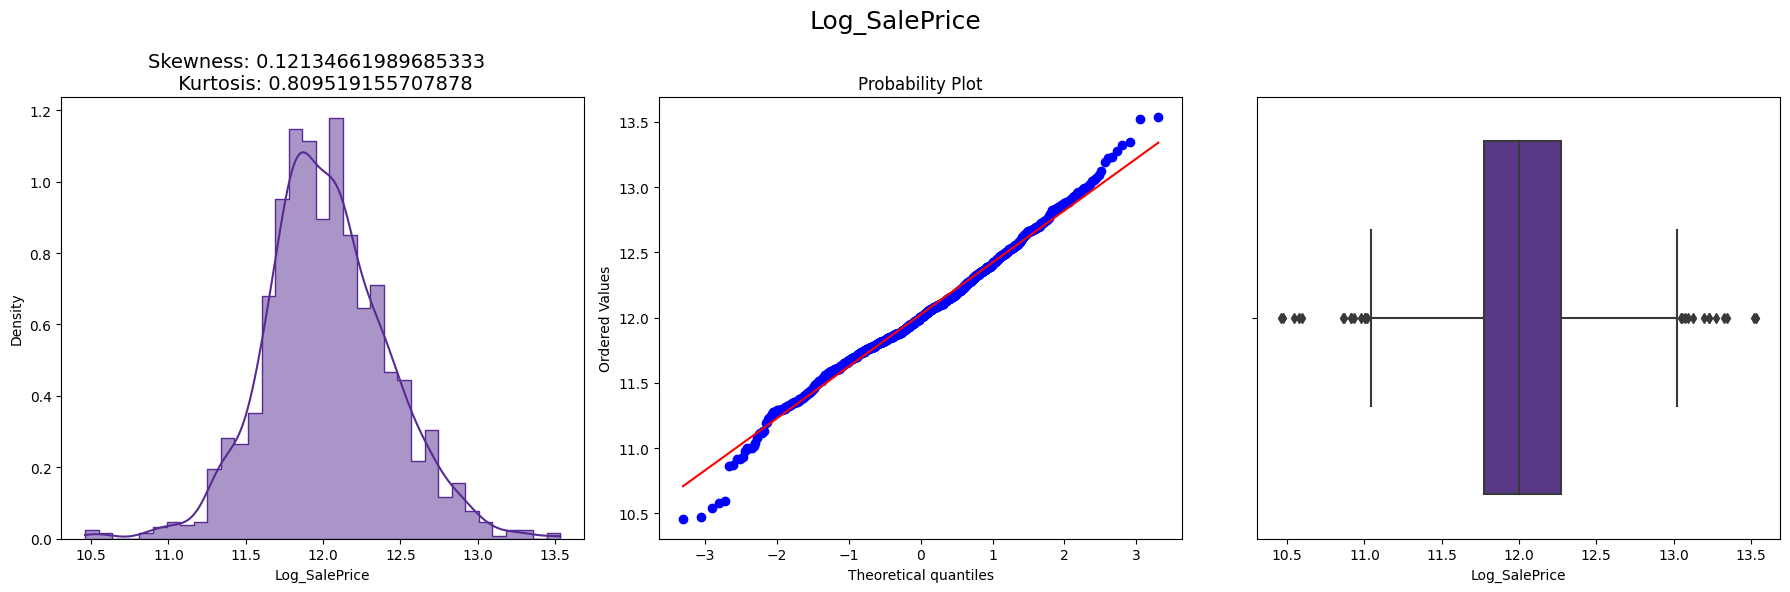

In [17]:
train['Log_SalePrice'] = np.log1p(train.SalePrice)
targe_plot('Log_SalePrice')

### Looking at correlations with the target variable <a id="correlations"></a>

Correlations can help to identify which variables are most important in predicting the target variable. Also, if two variables are highly correlated, it may be possible to use only one of them in the model, which can simplify the model and reduce overfitting.

<img src="https://machinelearningmastery.com/wp-content/uploads/2019/11/How-to-Choose-Feature-Selection-Methods-For-Machine-Learning.png" alt="drawing" width="500"/>

* To measure the correlation between the target and numerical features, we will use Spearman's correlation since this one doesn't assume linearity. 
* We will use the ANOVA test to measure the correlation between the target and categorical features.



#### Numerical Features <a id="Numerical"></a>

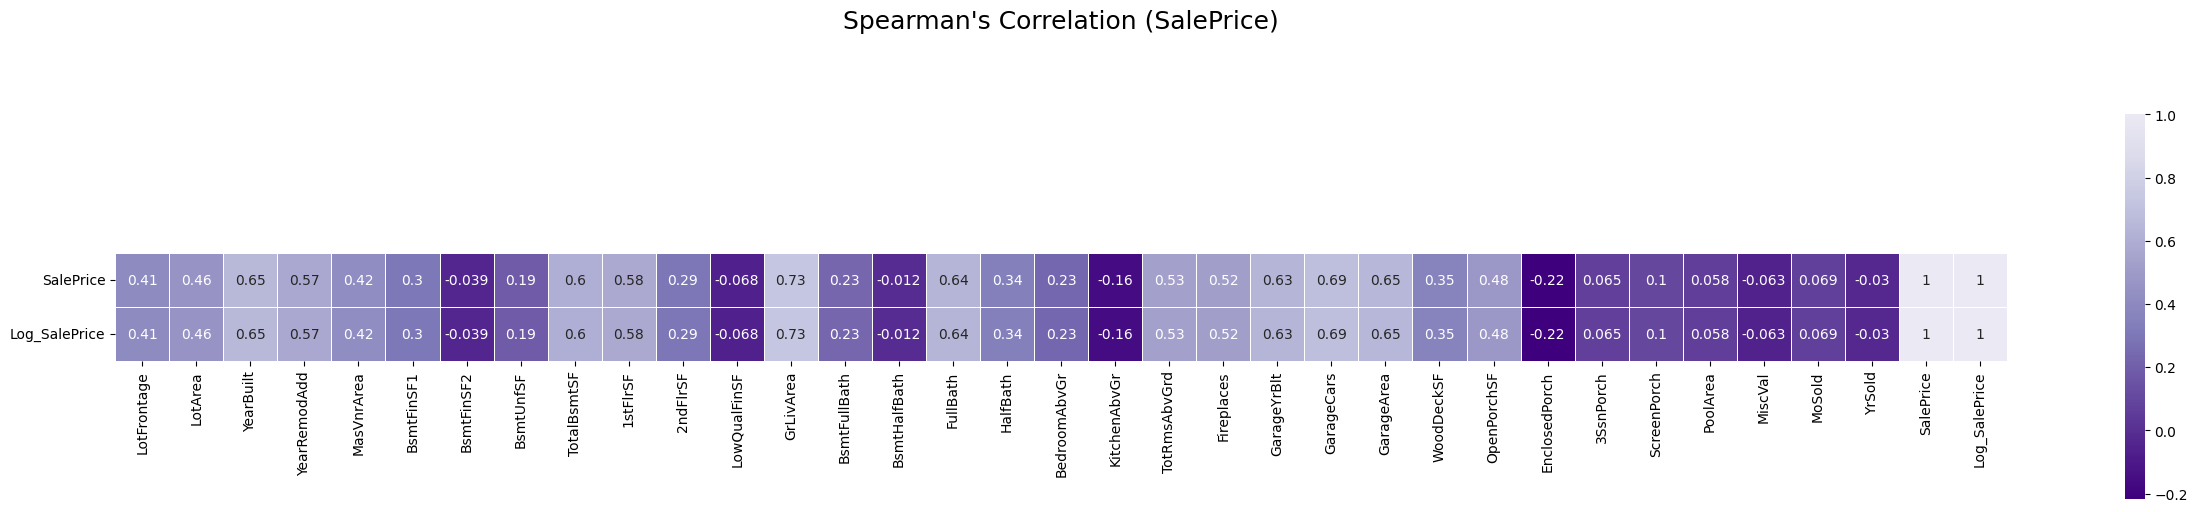

In [18]:
########################################### Numerical Correlation ######################################################
################################### Spearman's Correlation numerical Variables #########################################

mat_corr=train.corr(method='spearman')[['SalePrice', 'Log_SalePrice']]

plt.figure(figsize=(25,8), dpi=100)

sns.heatmap(mat_corr.T, annot=True, center=0.5, vmax=1, cmap=palettes[1],
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Spearman's Correlation (SalePrice)", fontsize=18, y=3)
plt.tight_layout()
plt.show()

In [19]:
# Numerical Variables with a strong relationship to the target
num_feat_sel = mat_corr[abs(mat_corr.SalePrice)>0.5].index.to_list()
print('Selected Numerical Features: \n\n', num_feat_sel)

Selected Numerical Features: 

 ['YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice', 'Log_SalePrice']


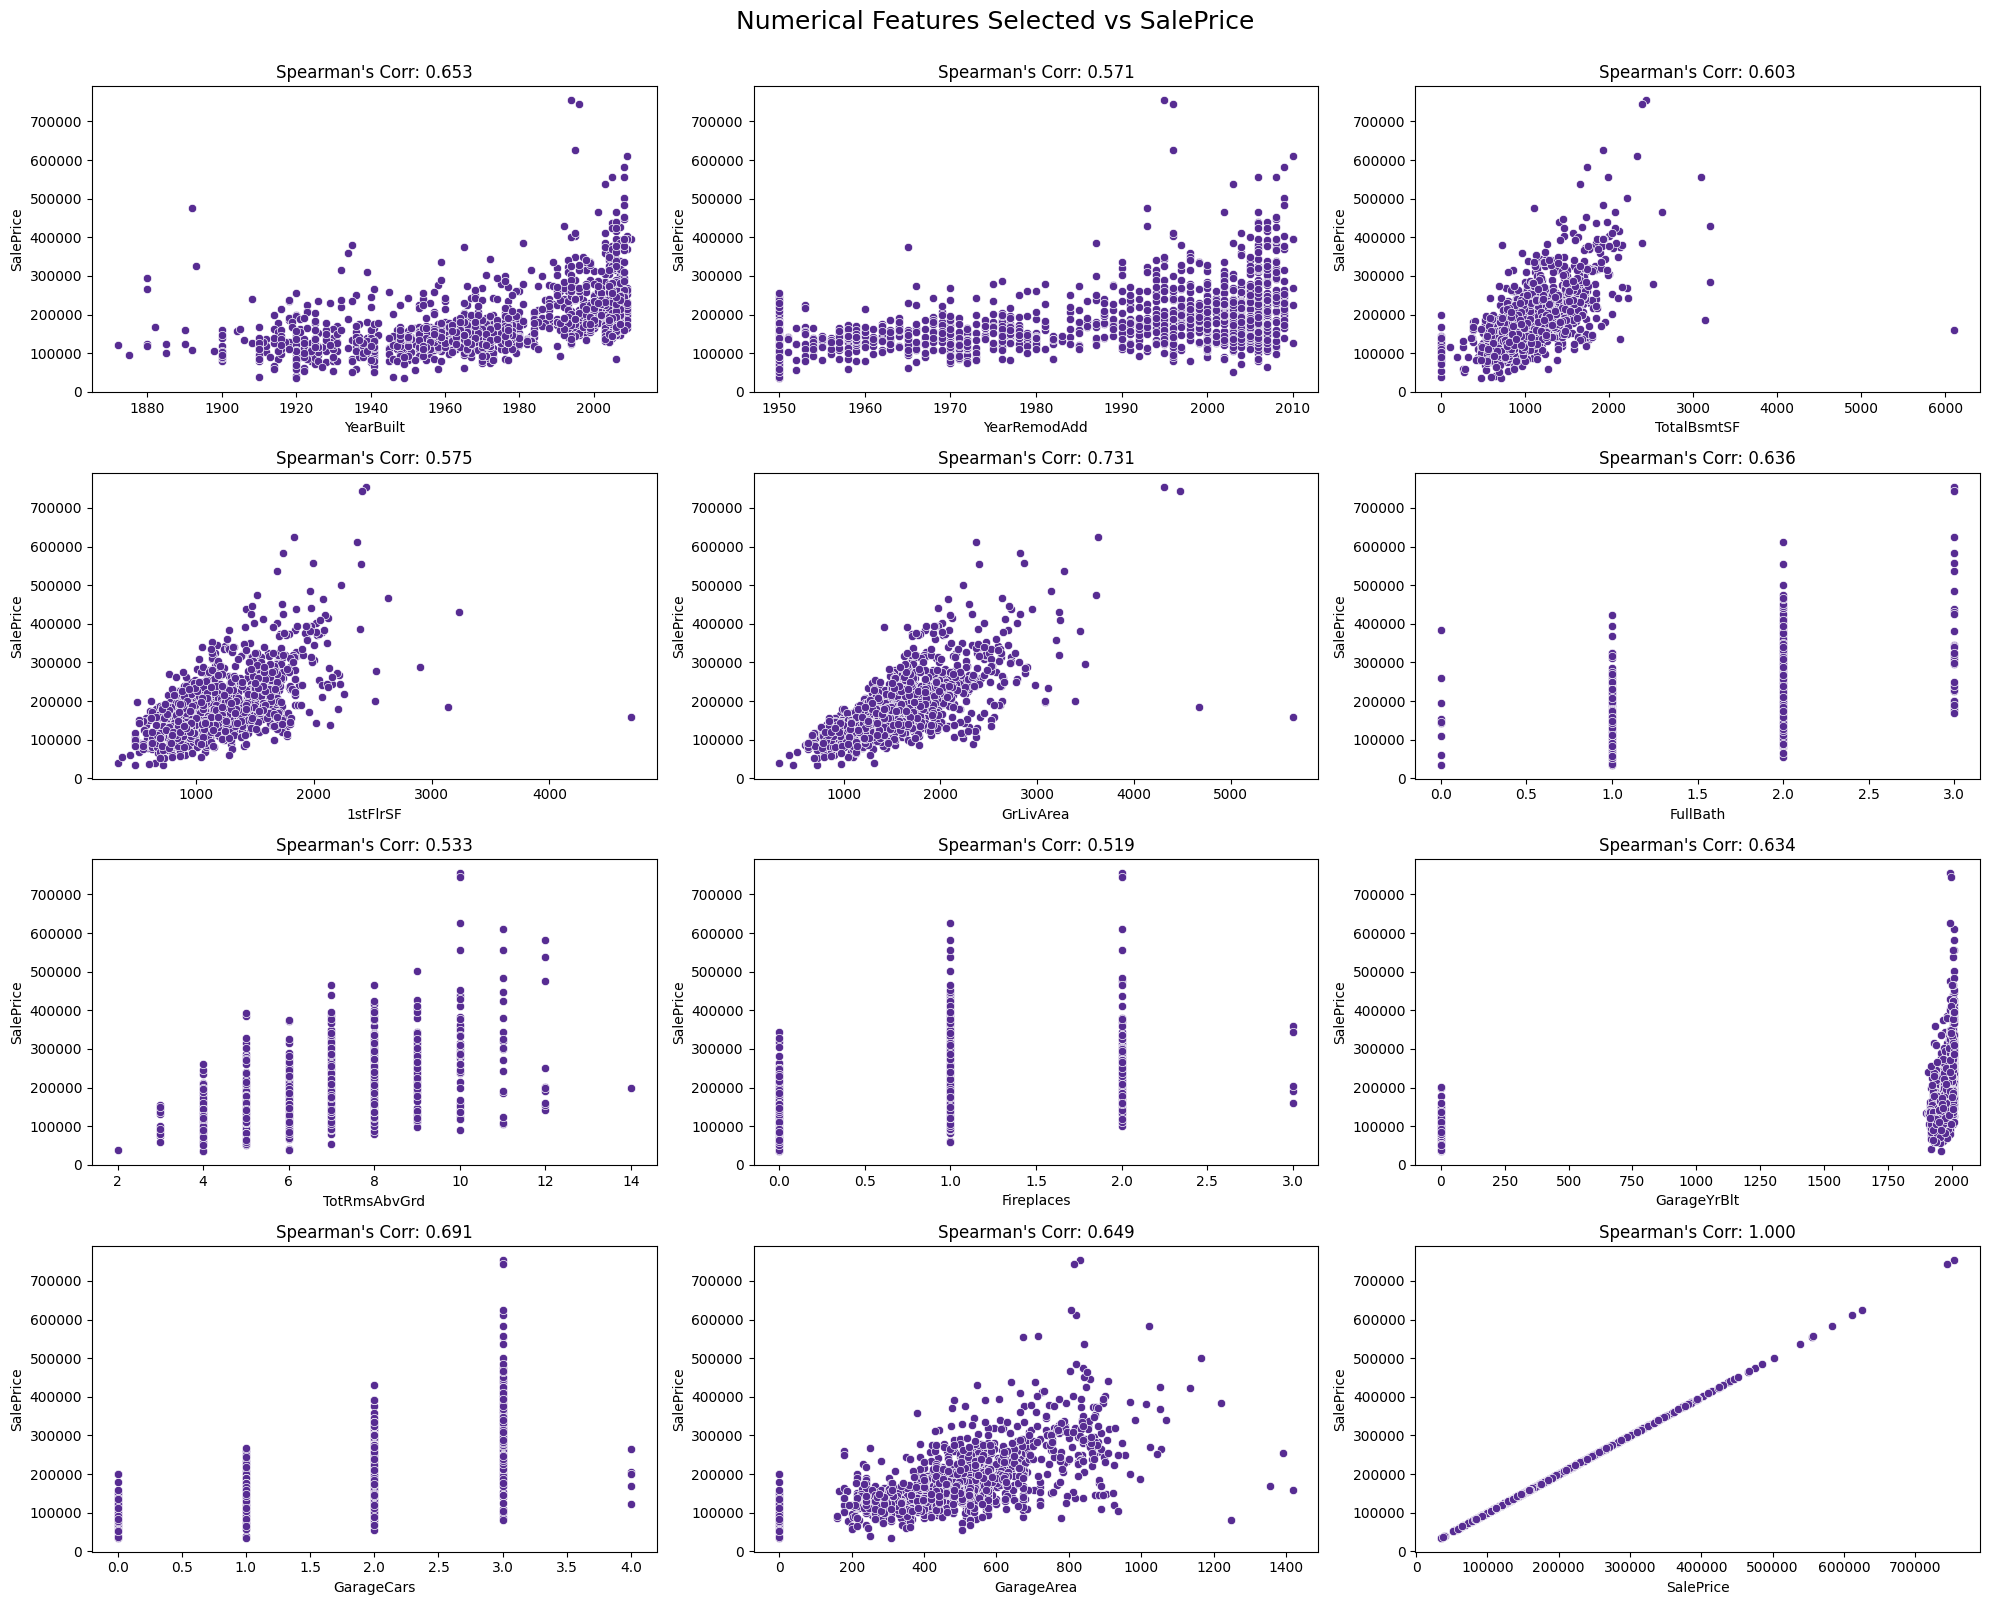

In [20]:
ncols = 3
nrows = round(len(num_feat_sel)/ncols)
fig, ax = plt.subplots(nrows, ncols,figsize=(20,nrows*4), dpi=100)
for idx, col in enumerate(num_feat_sel[:-1]):
    chart = sns.scatterplot(x=col, y='SalePrice', data=train, ax=ax[idx//ncols, idx%ncols])
    chart.set_title(f"Spearman's Corr: {mat_corr.SalePrice[col]:.3f}")

fig.suptitle('Numerical Features Selected vs SalePrice', fontsize=18 , y=1)
fig.tight_layout()
plt.show()

In [21]:
train[train.GrLivArea >= 4500]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Log_SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
524,60,RL,130.0,40094,Pave,NA,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NA,NA,NA,0,10,2007,New,Partial,184750,12.126764
1299,60,RL,313.0,63887,Pave,NA,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NA,NA,0,1,2008,New,Partial,160000,11.982935


In [22]:
train_orig = train.copy()

# Get rid of outliers in GrLivArea > 4500
train = train[train.GrLivArea < 4500].copy()
train.reset_index(drop = True, inplace = True)

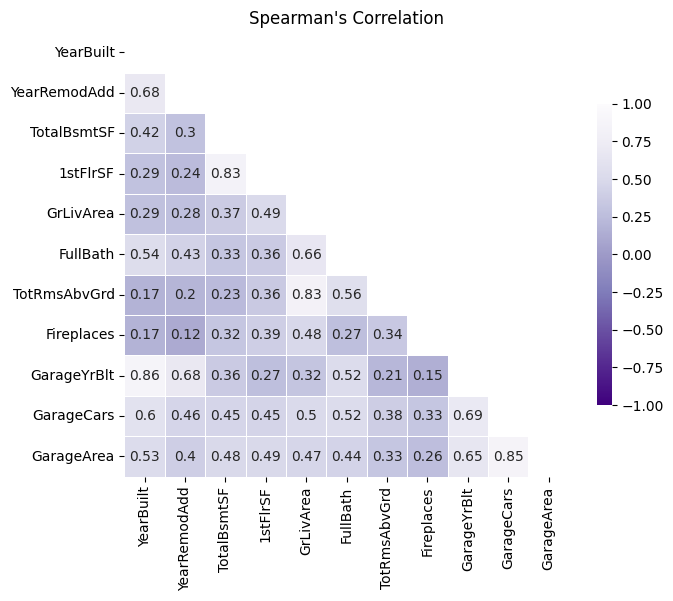

In [23]:
# Spearman's Correlation for the numerical variables previously selected

plt.figure(figsize=(7,7), dpi=100)
mat_corr=train[num_feat_sel[:-2]].corr(method='spearman')

sns.heatmap(mat_corr, annot=True, mask=np.triu(np.ones_like(mat_corr, dtype=bool)), center=0, vmax=1, vmin=-1, cmap=palettes[1],
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Spearman's Correlation", fontsize=12 )
plt.tight_layout()
plt.show()

**Observations**
* These variables have a strong correlation:
    * **GarageYrBlt** & Yearbuilt = 0.86 
    * TotRmsAbvGrd & GrLivArea = 0.83 
    * 1stFlrSF & TotalBsmtSF  = 0.83 
    * **GarageArea** & GarageCars = 0.85

#### Categorical Features <a id="Categorical"></a>

In [24]:
############################################# Categorical Correlation ######################################################
################################### ANOVA Test Categorical Inputs Numerical Output #########################################

anova_feat = train.columns[train.dtypes=='object'].to_list()

anovaStats = []

for var in anova_feat:
    catGrouplist = train.groupby(var).Log_SalePrice.apply(list)
    anovaStats.append([var, *stats.f_oneway(*catGrouplist)])
    
anova_df = pd.DataFrame(anovaStats, columns=['Feature', 'statistic', 'pvalue'])

In [25]:
cat_feat_sel = anova_df[anova_df.pvalue<0.05].sort_values('pvalue').reset_index(drop=True)[:28].Feature
anova_df[anova_df.pvalue<0.05].sort_values('pvalue').reset_index(drop=True)[:28]

,Feature,statistic,pvalue
0,OverallQual,342.944588,0.000000e+00
1,Neighborhood,79.751025,1.634888e-243
2,ExterQual,422.324938,2.866856e-197
3,BsmtQual,303.646186,6.791010e-190
4,KitchenQual,397.495324,1.637677e-188
5,GarageFinish,299.148248,3.152865e-151
6,GarageType,121.830070,8.471072e-125
7,MSSubClass,50.959469,3.547688e-115
8,FireplaceQu,131.238108,6.914417e-115
9,Foundation,126.857929,1.309516e-111


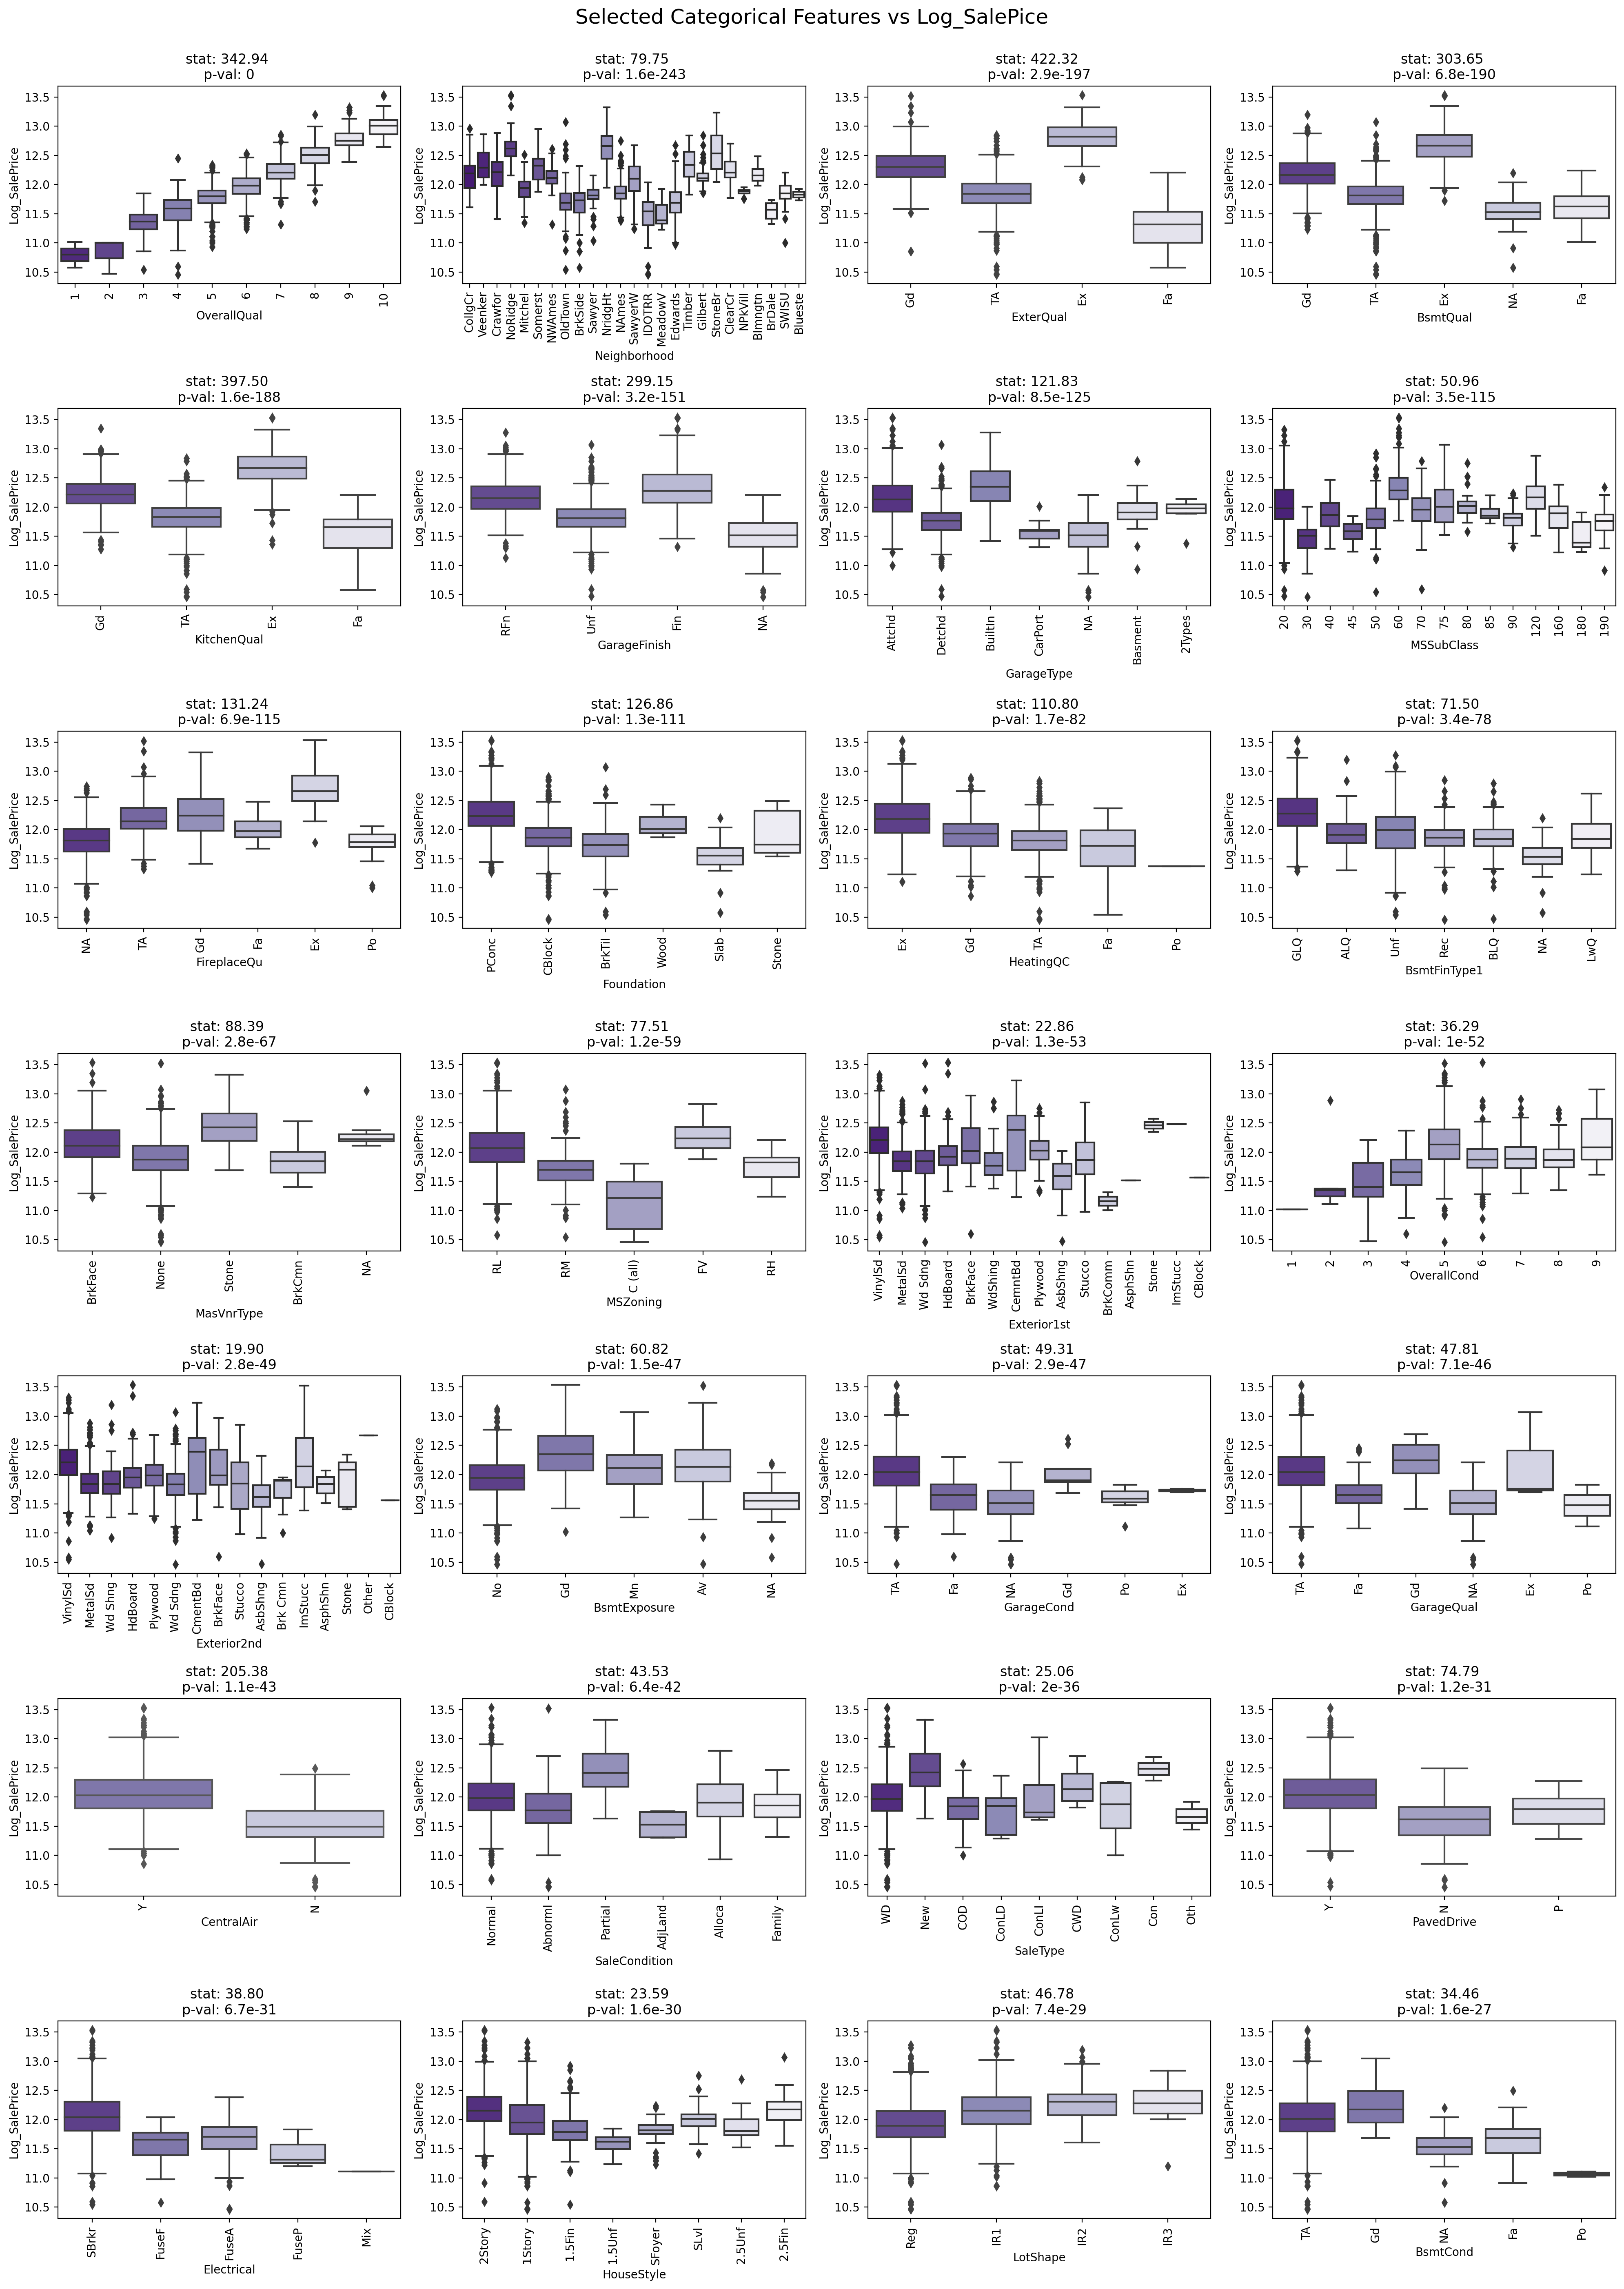

In [26]:
ncols = 4 
nrows = round(len(cat_feat_sel)/ncols)

fig, ax = plt.subplots(nrows, ncols,figsize=(20,nrows*4), dpi=200)

for idx, col in enumerate(cat_feat_sel):
    chart=sns.boxplot(x=col, y='Log_SalePrice', data=train, ax=ax[idx//ncols, idx%ncols],  palette=palettes[1])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    arr = anova_df.loc[anova_df.Feature==col, ['statistic', 'pvalue']].values[0]
    chart.set_title(f"stat: {arr[0]:.2f} \np-val: {arr[1]:.2g}")

fig.suptitle('Selected Categorical Features vs Log_SalePice', fontsize=18 , y=1)
plt.tight_layout()
plt.show()

In [27]:
# Assiging column names to row indexs 
chi2matrix=pd.DataFrame(train[cat_feat_sel],columns=cat_feat_sel,index=cat_feat_sel)

for icol in cat_feat_sel: # Outer loop
    for jcol in cat_feat_sel: # inner loop
        
        # Converting to cross tab as for CHi-square test we have to first convert variables into contigency table
        crosstab=pd.crosstab(train[icol],train[jcol])
      
        #Getting p-value and other usefull information
        stat,p,dof,expected = stats.chi2_contingency(crosstab)

        # Rounding very small p-values to zero
        chi2matrix.loc[icol,jcol]= p
        
        # As mentioned above Expected frequencies should be at least 5 for the majority (80%) of the cells.
        # Here we are checking expected frequency of each group
        cntexpected=expected[expected<5].size
        #Getting percentage 
        perexpected=((expected.size-cntexpected)/expected.size)*100

        if perexpected<20:
            chi2matrix.loc[icol,jcol]=1
        if icol==jcol:
             chi2matrix.loc[icol,jcol]=0.00
        

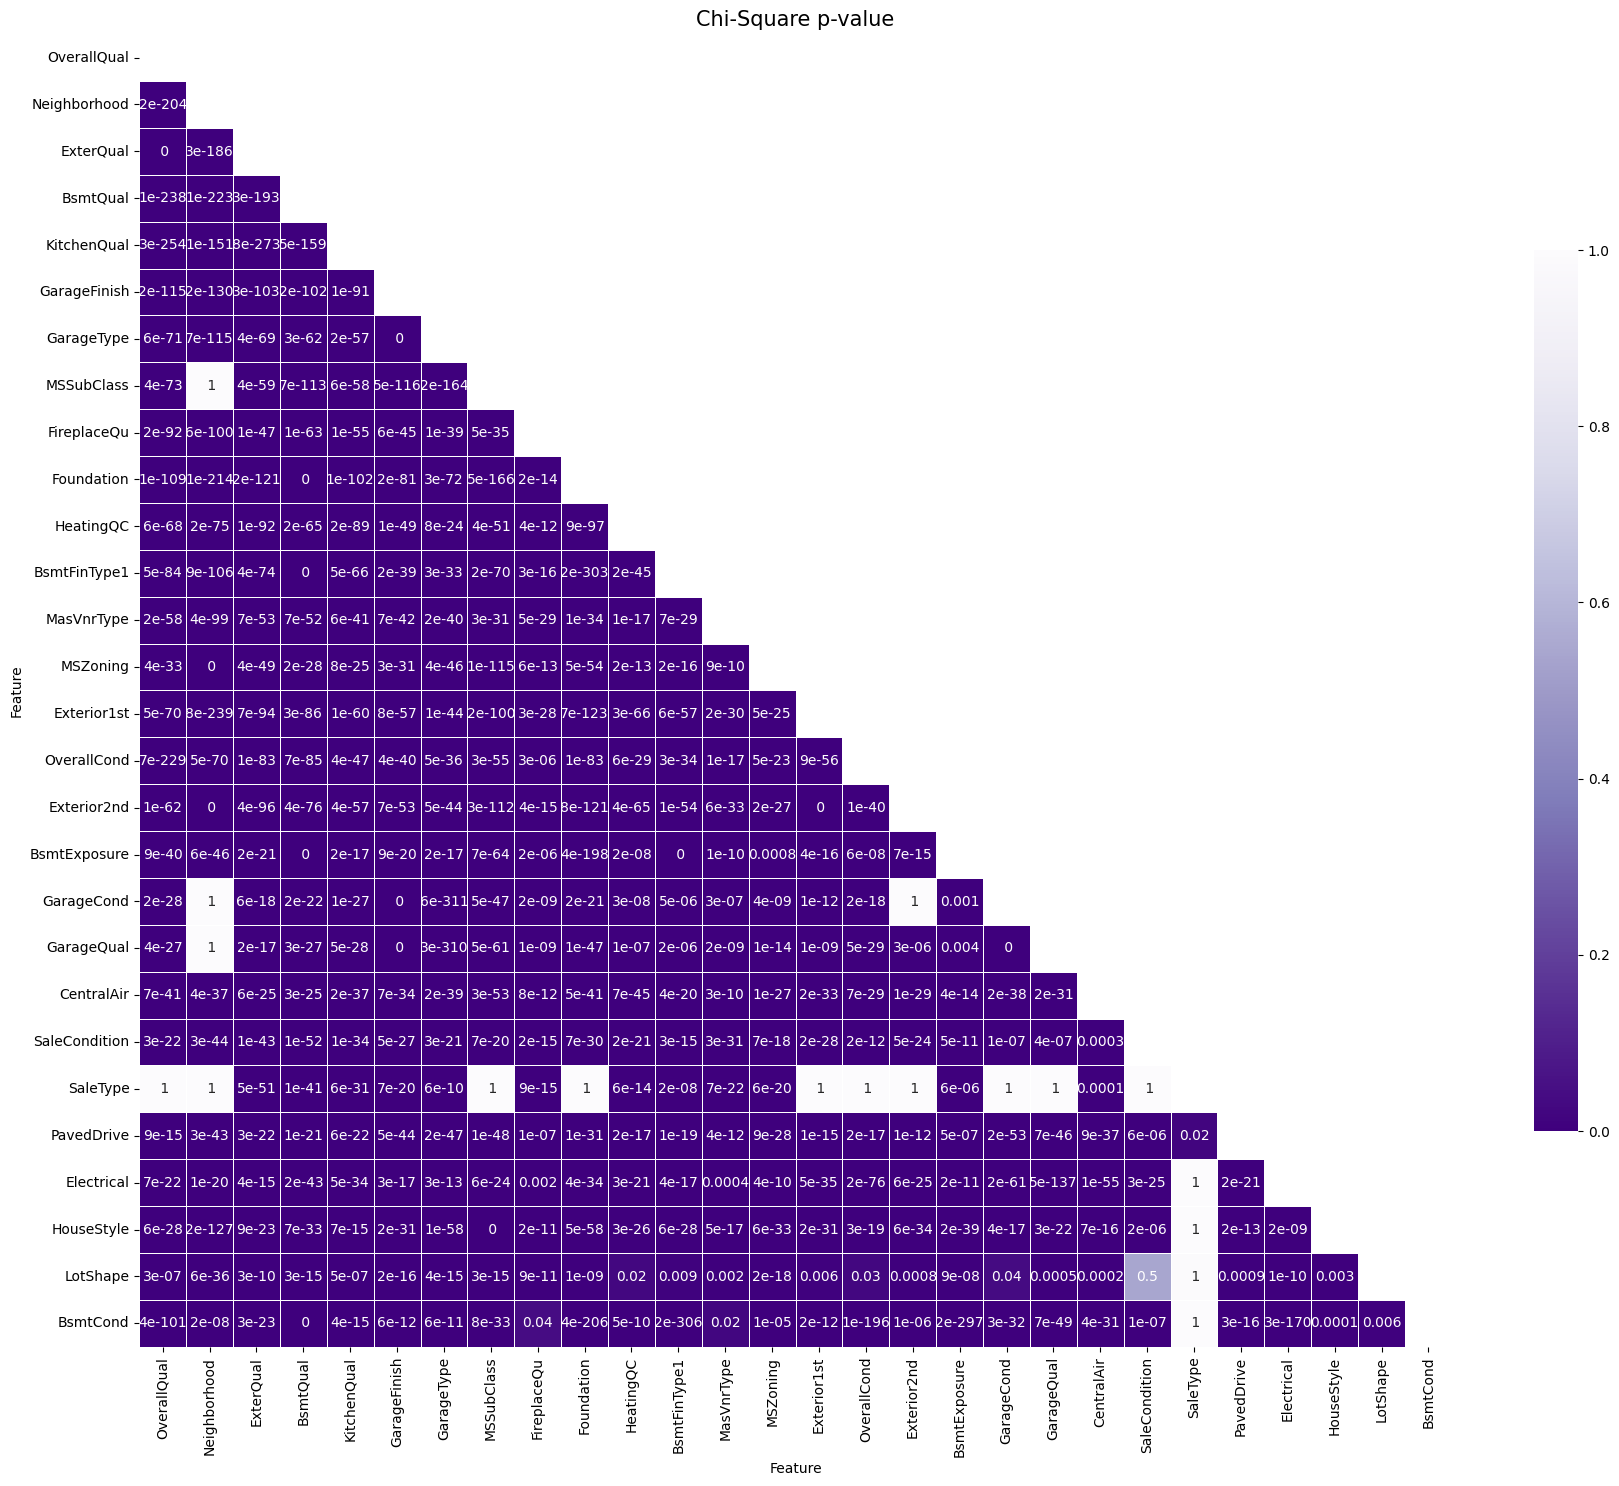

In [28]:
plt.figure(figsize=(18,18), dpi=100)

chi2matrix = chi2matrix.astype(float)

sns.heatmap(chi2matrix, 
            annot=True, fmt='2.0g', 
            mask=np.triu(np.ones_like(chi2matrix, dtype=bool)), 
            cmap=palettes[1], square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Chi-Square p-value", fontsize=15 )
plt.tight_layout()
plt.show()

**Observations**
* These variables have a strong correlation:
    * OverallQual & ExterQual 
    * Neighborhood & **MSZonnig** 
    * Neighborhood & **Exterior2nd**
    * BsmtQual & **BsmtCond**
    * BsmtQual & BsmtExposure
    * BsmtQual & BsmtFinType1
    * BsmtQual & Fundation
    * BsmtFinType1 & BsmtExposure
    * GarageFinish & **GarageQual**
    * GarageFinish & GarageCond
    * GarageFinish & GarageType
    * GarageCond & **GarageQual**
    * MSSubClass & **HouseStyle**
    * Exterior1st & **Exterior2nd**


### Feature Selection & Encoding <a id="Selection"></a>

Based on Spearman's Correlation, ANOVA test, and Chi-Squared test, these are the selected features:
* YearBuilt
* YearRemodAdd
* TotalBsmtSF
* 1stFlrSF
* GrLivArea
* FullBath
* TotRmsAbvGrd
* Fireplaces
* GarageCars
* OverallQual
* Neighborhood
* ExterQual
* BsmtQual
* KitchenQual
* GarageFinish
* GarageType
* MSSubClass
* FireplaceQu
* Foundation
* HeatingQC
* BsmtFinType1
* MasVnrType
* Exterior1st
* OverallCond
* BsmtExposure
* GarageCond
* CentralAir
* SaleCondition
* SaleType
* PavedDrive
* Electrical
* LotShape


In [29]:
remov = ['GarageArea', 'GarageYrBlt', 'Exterior2nd', 'MSZoning', 'HouseStyle', 'GarageQual', 'BsmtCond']
num_feat = [feat for feat in num_feat_sel if feat not in remov][:-2]
cat_feat = [feat for feat in cat_feat_sel if feat not in remov]

In [30]:
# feature selection
sel_feat = np.concatenate((num_feat,cat_feat))

test_sel = test[sel_feat].copy()
train_sel = train[sel_feat].copy()

train_sel.shape, test_sel.shape

((1458, 32), (1459, 32))

In [31]:
# Convert the categorical features in the train and test sets independently
train_sel = pd.get_dummies(train_sel)
test_sel = pd.get_dummies(test_sel)
print(train_sel.shape, test_sel.shape)

# Reindex the columns of the test set aligning with the train set
test_sel = test_sel.reindex(columns=train_sel.columns, fill_value=0)
print(train_sel.shape, test_sel.shape)

(1458, 176) (1459, 174)
(1458, 176) (1459, 176)


In [32]:
test_sel.head()

,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,OverallQual_1,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageFinish_Fin,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,OverallCond_1,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,CentralAir_N,CentralAir_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,1961,1961,882.0,896,896,1,5,0,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
1462,1958,1958,1329.0,1329,1329,1,6,0,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0
1463,1997,1998,928.0,928,1629,2,6,1,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,

In [33]:
X = train_sel
y = train['SalePrice']
y_log = train['Log_SalePrice']
X_test = test_sel

X.shape, y.shape, y_log.shape, X_test.shape

((1458, 176), (1458,), (1458,), (1459, 176))

## MODELING <a id="MODELING"></a>

When the target variable is continuous, regression models are commonly used to make predictions. Some popular regression models include:

**Ridge Regression**: Ridge regression is a variation of linear regression that adds a penalty term to the cost function to prevent overfitting. This penalty term is known as the L2 regularization term, and it forces the model to have small coefficients.

**Lasso Regression**: Lasso regression is another variation of linear regression that adds a penalty term to the cost function to prevent overfitting. This penalty term is known as the L1 regularization term, and it forces the model to have sparse coefficients, which means that many of the coefficients will be exactly equal to zero.

**Elastic Net**: Elastic Net is an extension of Ridge and Lasso Regression, it combines both L1 and L2 regularization terms and allows for a combination of both feature selection and shrinking of coefficients.

**Bayesian Ridge Regression** is a variation of Ridge Regression that uses a Bayesian approach to estimate the model parameters. The main advantage of using a Bayesian approach is that it allows for the incorporation of prior information about the model parameters, which can lead to more robust and stable estimates.

**Kernel Ridge Regression** is an extension of Ridge Regression that uses a kernel trick to transform the input data into a higher-dimensional space, where it becomes linear. This allows the model to handle non-linear relationships between the independent variables and the target variable.

**Support Vector Regression** (SVR): SVR is a non-linear model that uses a technique known as kernel trick to transform the input data into a higher dimensional space, where it becomes linear.

**Random Forest Regressor** is an ensemble learning method that uses multiple decision trees to make predictions. It is a non-parametric model, meaning that it does not make assumptions about the underlying distribution of the data.

**Gradient Boosting Regressor** (GBR) is an ensemble learning method that uses multiple decision trees to make predictions. It is a supervised learning algorithm that uses the gradient descent algorithm to minimize the loss function.

In [34]:
################### Linear Models#######################
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge, BayesianRidge 

################### Non-Linear Models#######################
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor 

from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error

**Metric**

Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

**Scaling**

Robust Scaler is a pre-processing method used in machine learning to scale the features of a dataset. It is similar to the Standard Scaler, but it is more robust to outliers.

In [35]:
def cv_rmse(model):
    scores_rmse = np.sqrt(-cross_val_score(model, X, y_log, scoring="neg_mean_squared_error", cv=kfold, n_jobs=4))
    mean_rmse = scores_rmse.mean()
    std_rmse = scores_rmse.std()
    return mean_rmse, std_rmse

### Baseline Models with 10-folds CV <a id="Baseline"></a>

In [36]:
cv_score = []

baseline_models = [('Ridge', Ridge()), ('Lasso', Lasso()), ('ElasticNet', ElasticNet()), 
                   ('BayesianRidge', BayesianRidge()), ('SVR', SVR()), ('KernelRidge', KernelRidge()),
                    ('RandomForestRegressor', RandomForestRegressor(random_state=5)), ('GradientBoostingRegressor', GradientBoostingRegressor(random_state=5)), 
]

for idx, (name, model) in enumerate(baseline_models):
    kfold = KFold(n_splits=10, random_state=3, shuffle=True)

    if idx < 6:
        pipe = make_pipeline(RobustScaler(), model)
        cv_score.append((name, *cv_rmse(pipe)))
    else: 
        cv_score.append((name, *cv_rmse(model)))   

cv_scores = pd.DataFrame(data=cv_score, columns=['model', 'mean_rmse', 'std_rmse']).sort_values('mean_rmse').set_index('model')
cv_scores

,mean_rmse,std_rmse
model,,
BayesianRidge,0.120610,0.012954
Ridge,0.121846,0.013466
SVR,0.130830,0.015076
GradientBoostingRegressor,0.133967,0.012418
RandomForestRegressor,0.144043,0.011123
KernelRidge,0.146786,0.019507
Lasso,0.399081,0.024215
ElasticNet,0.399081,0.024215


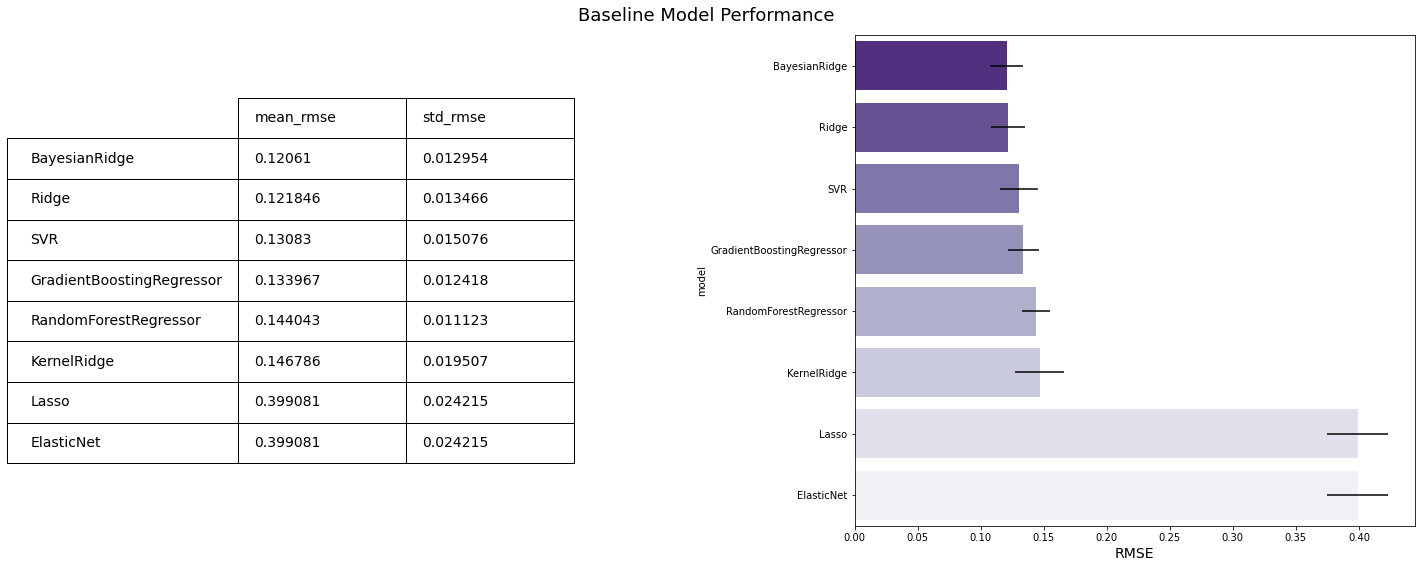

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))

# Print the DataFrame
ax1.axis('off')
table = ax1.table(
            cellText=np.round(cv_scores.values, 6), colLabels=cv_scores.columns, rowLabels=cv_scores.index,
            loc='center',cellLoc='left', colLoc='left', colWidths=[0.15,0.15]
)
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(2, 3)

# Create the bar plot
sns.barplot(x='mean_rmse', y=cv_scores.index, data=cv_scores, orient="h", xerr=cv_scores['std_rmse'], ax=ax2, palette=palettes[1])
ax2.set_xlabel('RMSE', fontsize=14)

plt.suptitle('Baseline Model Performance', fontsize=18)
plt.tight_layout()
plt.show()

### Hyperparameter Optimization <a id="Hyperparameter"></a>

Hyperparameter optimization is the process of choosing the best set of hyperparameters for a machine learning model. Hyperparameters are parameters that are not learned from the data, but are set by the user before training the model. 

**Grid Search**: Grid search is a simple and widely used method for hyperparameter optimization. It involves specifying a grid of possible values for each hyperparameter and training a model for each combination of hyperparameters. The best set of hyperparameters is chosen based on the performance of the model on a validation set.

In [38]:
def grid_search(model, param_grid, ens=False):
    grid_search = GridSearchCV(model, param_grid, cv=kfold, scoring='neg_mean_squared_error', n_jobs=4)
    grid_search.fit(X, y_log)
    bestestimator = grid_search.best_estimator_ 
    bestscore= np.sqrt(-grid_search.best_score_) 
    bestparams= grid_search.best_params_
    if not ens:
        return bestestimator, bestscore
    else:
        return bestparams, bestscore

In [39]:
params = [
    {'ridge__alpha':[3, 5, 7, 9, 11, 13, 15]}, #ridge
    {'lasso__alpha':[ 0.0001, 0.0003, 0.0005, 0.0007, 0.0009], 'lasso__max_iter':[1e5]}, # lasso
    {'elasticnet__alpha':[0.0004, 0.0005, 0.0007, 0.001], 'elasticnet__l1_ratio': [0.3, 0.6, 0.9]}, # elasticnet
    {'bayesianridge__alpha_1': [1e-7, 1e-6, 1e-5, 1e-4], 'bayesianridge__alpha_2': [1e-7, 1e-6, 1e-5, 1e-4],
      'bayesianridge__lambda_1': [1e-7, 1e-6, 1e-5, 1e-4], 'bayesianridge__lambda_2': [1e-7, 1e-6, 1e-5, 1e-4]}, #bayesianridge
    {'svr__epsilon': [0.001, 0.005, 0.009], 'svr__kernel' : ['poly', 'rbf', 'sigmoid'] ,
        'svr__degree':[1, 2, 3], 'svr__C':[1,5,10], 'svr__gamma': [0.00001, 0.00005, 0.0009],}, #svr
    {'kernelridge__alpha': [0.1, 0.3, 0.6, 0.9], 'kernelridge__kernel':['linear','polynomial'], 
        'kernelridge__degree':[2,3,4], 'kernelridge__coef0':[0.01, 2.5, 5]}, #kernelridge
    {'n_estimators': [100, 300, 500,], 'max_depth': [5, 7, None], 'min_samples_split': [6, 8]}, #randomforest
    {'n_estimators': [100, 300, 500], 'max_depth': [3, 6], 'learning_rate': [0.01, 0.1], 'loss' : ['huber']}, #gradientbosting
]

best_estimator = []

for idx, ((name, model), param_grid) in enumerate(zip(baseline_models, params)):
    if idx < 6:
        pipe = make_pipeline(RobustScaler(), model)
        best_estimator.append((name, *grid_search(pipe, param_grid)))
    else:
        best_estimator.append((name, *grid_search(model, param_grid, ens=True)))


In [40]:
best_estimators = pd.DataFrame(data=best_estimator, columns=['model', 'best_estimator', 'best_score']
                               ).sort_values('best_score').set_index('model')
best_estimators

,best_estimator,best_score
model,,
KernelRidge,"(RobustScaler(), KernelRidge(alpha=0.6, coef0=2.5, kernel='polynomial'))",0.118490
SVR,"(RobustScaler(), SVR(C=10, degree=1, epsilon=0.009, gamma=0.0009))",0.120409
ElasticNet,"(RobustScaler(), ElasticNet(alpha=0.001, l1_ratio=0.3))",0.120829
Lasso,"(RobustScaler(), Lasso(alpha=0.0003, max_iter=100000.0))",0.121059
Ridge,"(RobustScaler(), Ridge(alpha=5))",0.121082
BayesianRidge,"(RobustScaler(), BayesianRidge(alpha_1=1e-07, alpha_2=0.0001, lambda_1=0.0001, lambda_2=1e-07))",0.121304
GradientBoostingRegressor,"{'learning_rate': 0.1, 'loss': 'huber', 'max_depth': 3, 'n_estimators': 300}",0.131109
RandomForestRegressor,"{'max_depth': None, 'min_samples_split': 6, 'n_estimators': 500}",0.143766


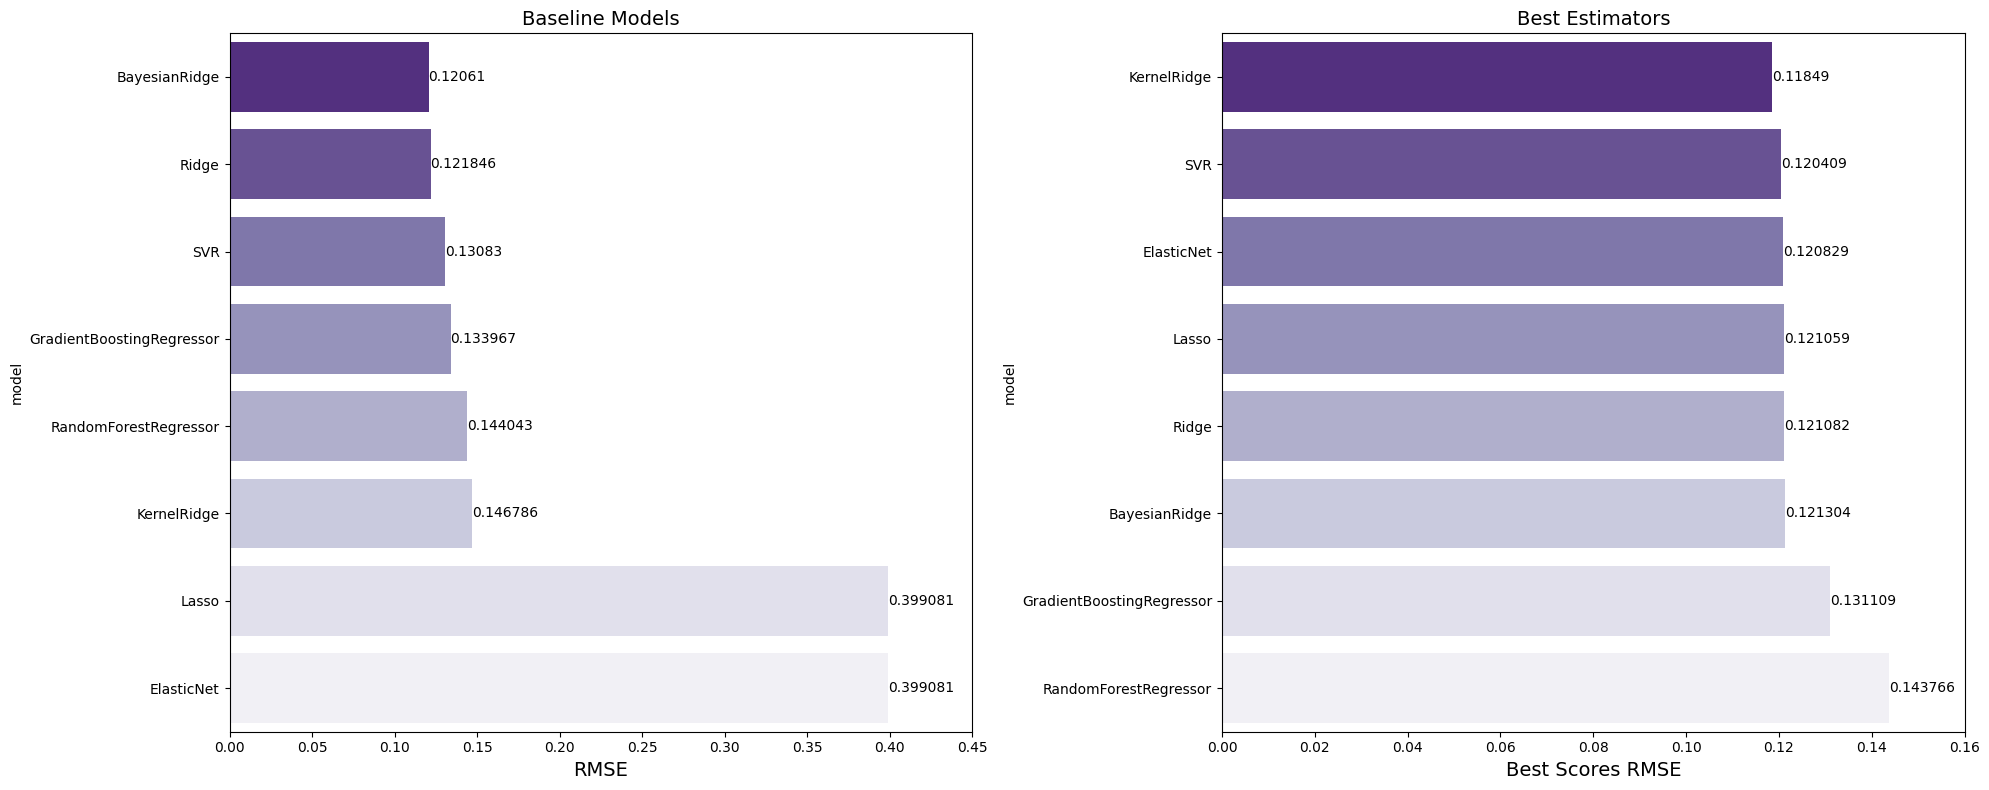

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8), dpi=100)

# baseline models
chart= sns.barplot(x='mean_rmse', y=cv_scores.index, data=cv_scores, orient="h", ax=ax1, palette=palettes[1])
for val in chart.containers:
    chart.bar_label(val,)
    
ax1.set_xlabel('RMSE', fontsize=14)
ax1.set_xlim(xmax=0.45)
ax1.set_title('Baseline Models', fontsize=14)

# best estimators
chart = sns.barplot(x='best_score', y=best_estimators.index, data=best_estimators, orient="h", ax=ax2, palette=palettes[1])
for val in chart.containers:
    chart.bar_label(val,)
    
ax2.set_xlabel('Best Scores RMSE', fontsize=14)
ax2.set_xlim(xmax=0.16)
ax2.set_title('Best Estimators', fontsize=14)

plt.tight_layout()
plt.show()

### Stacking <a id="Stacking"></a>

Stacking is an ensemble learning method that combines the predictions of multiple models to make a final prediction. It works by training a meta-model to make a final prediction based on the predictions of several base models.

In stacking, the base models are trained on the original dataset and make predictions on a separate validation set. These predictions are then used as input features for the meta-model, which is trained to make a final prediction.

There are two types of stacking:

Homogeneous stacking: The base models are all of the same type, such as multiple decision trees or multiple neural networks.

Heterogeneous stacking: The base models are of different types, such as a decision tree, a neural network, and a support vector machine.

The key advantage of stacking is that it allows to combine the strengths of different models to achieve better performance than any individual model.

In [42]:
best_estimators.reset_index()['best_estimator'][1:-2].to_list()

[Pipeline(steps=[('robustscaler', RobustScaler()),
                 ('svr', SVR(C=10, degree=1, epsilon=0.009, gamma=0.0009))]),
 Pipeline(steps=[('robustscaler', RobustScaler()),
                 ('elasticnet', ElasticNet(alpha=0.001, l1_ratio=0.3))]),
 Pipeline(steps=[('robustscaler', RobustScaler()),
                 ('lasso', Lasso(alpha=0.0003, max_iter=100000.0))]),
 Pipeline(steps=[('robustscaler', RobustScaler()), ('ridge', Ridge(alpha=5))]),
 Pipeline(steps=[('robustscaler', RobustScaler()),
                 ('bayesianridge',
                  BayesianRidge(alpha_1=1e-07, alpha_2=0.0001, lambda_1=0.0001,
                                lambda_2=1e-07))])]

In [43]:
from mlxtend.regressor import StackingCVRegressor

# initialize base models
sel_models = best_estimators.reset_index()['best_estimator'][1:-2].to_list()

# initialize meta-model
meta = best_estimators.reset_index()['best_estimator'][0]

# initialize StackingCVRegressor
stack = StackingCVRegressor(regressors=sel_models, meta_regressor=meta)

# fit stack
stack.fit(X, y_log)

StackingCVRegressor(meta_regressor=Pipeline(steps=[('robustscaler',
                                                    RobustScaler()),
                                                   ('kernelridge',
                                                    KernelRidge(alpha=0.6,
                                                                coef0=2.5,
                                                                kernel='polynomial'))]),
                    regressors=[Pipeline(steps=[('robustscaler',
                                                 RobustScaler()),
                                                ('svr',
                                                 SVR(C=10, degree=1,
                                                     epsilon=0.009,
                                                     gamma=0.0009))]),
                                Pipeline(steps=[('robustscaler',
                                                 RobustScaler()),
                               

### Prediction <a id='Prediction'></a>

In [44]:
# predict with stack
yhat = stack.predict(X_test)
yhat = np.expm1(yhat)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but RobustScaler was fitted wi

In [45]:
sub = pd.DataFrame(yhat, index=X_test.index.astype(int), columns=['SalePrice'])
sub.to_csv('sub.csv')
sub.head()

,SalePrice
Id,
1461,116528.379397
1462,148971.825694
1463,186322.127444
1464,198585.211128
1465,195050.327062


## CONCLUSION <a id="conclusion"></a>

In this notebook, we explored a Stacking Approach to predicting the sale price of houses in the House Prices - Advanced Regression Techniques dataset.


A machine learning regression project is a complex task that requires a thorough understanding of the data, the target, and the problem you are trying to solve.


* The first step in the project was to analyze the data, which included understanding the structure and characteristics of the data, and identifying any missing values or data types that needed correction.
* Next, the target variable was analyzed. Since it was not normally distributed, a new variable was created by applying the logarithmic transformation.
* Correlations were applied to select the most relevant features for the target variable.
* Categorical variables were encoded to use them in the machine learning algorithms.
* Various machine learning algorithms were applied, including linear regressions, SVR, and ensemble methods. 
* These algorithms were tuned to optimize their performance by adjusting the hyperparameters.
* The best-performing algorithms were selected for the final model.
* Finally, a stacking method was applied to combine the predictions of these models and improve the overall performance.



**If you made it through the end, THANK YOU!**

**Please leave a comment if you have any recommendations or corrections**

# Don't forget to upvote if you like my notebook :)
